# Climate Change in the Northern Great Basin
## Increasing Rainfall in Elko, NV




### Site Description 
Elko is located in Northwestern Nevada, with a population of over 20,000 people. It is a hub for gold mining (Nevada is the 5th largest gold producer in the world, behind four other countries, and most of that is mined near Elko), as well ranching, tourism, and the casino industry.  It is located on the banks of the Humboldt River. Very isolated, it is the largest city in 130 miles in each direction. It also has my home for three years. 

<img
src="Elko Couty Floods.jpg"
alt="Floods in Elko County, NV" 
width="75%" />

Elko County has had one or two large floods while in the last 7 years, including a one that caused an earthen dam to fail. This caused me to become curious if average precipitation had been increasing in Elko

### Data Description
Data for precipitation was gathered from the Global Historical Climatology Network - Daily (GHCN-Daily) for the Elko Airport Station. Precipitation data was collected from February 1888 to September 2024. 

### Methods Overview 
Data was downloaded from the above source via API for the entire range of precipitation available.  Total precipitation was then summed for each year.  The data then was plotted against an OLS regression trend line.  Though not the most robust way to determine precipitation trends, it was used since total annual precipitation values were being used, and the point of the data was to see if general trends were going up or down. 
### Results 
#### Graph of annual precipitation in Elko, Nevada since 1888. Trend line indicates that it has risen 1.5% over the last 130 years

<img
src="ElkoPrecipitation.png"
alt="Graph showing Annual Precipitation in Elko, NV Plotted against a Trendline" 
width="100%" />

The plotted data against the trendline shows that annual precipitation in Elko has risen, though very slowly.  This is likely due to the effects of climate change.  It is important to note that this data does not show that flooding events are more likely, as it only shows the total amount of rain in a given year.  Another analysis of daily precipitation, using different statistical methods like the Mann-Kendall (M-K) test could be used to see if flooding events are becoming more common.  Still this shows that annual rainfall in Elko, NV is increasing 

#### Sources

> <embed type="text/html" 
src="HW-4 Climate Change.html"
width="800" 
height="200">

#### Code

In [2]:
## Elko Nevada Climate Data
import pandas as pd
#import ploting 
import holoviews as hv
import hvplot.pandas
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
#For Model Summary 
import statsmodels.api as sm 
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression
import numpy as np #import number py 


In [3]:

#Data Source 
Elko_GHCN_data = (
    'https://www.ncei.noaa.gov/access/services/data/v1'
    '?dataset=daily-summaries'
    '&dataTypes=TOBS,PRCP'
    '&stations=USW00024121' #Elko Airport Data Station
    '&startDate=1888-02-01'
    '&endDate=2024-09-21'
    '&units=standard')
Elko_GHCN_data

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TOBS,PRCP&stations=USW00024121&startDate=1888-02-01&endDate=2024-09-21&units=standard'

In [4]:
#Grab data from API
Elko_df = pd.read_csv(       #Reads Csv file called above
    Elko_GHCN_data,                #Csv file from above
    index_col='DATE',                   #Set DATE column as the index, for subsetting and resampling later
    parse_dates=True,                   #Parse the dates as time-series data
    na_values=['NaN'])                  #Names missing values as NaN
Elko_df = Elko_df[['PRCP']] # Only call the Percip data from above columns
Elko_df

,PRCP
DATE,
1888-02-01,0.00
1888-02-02,0.00
1888-02-03,0.00
1888-02-04,0.00
1888-02-05,0.00
...,...
2024-09-17,0.28
2024-09-18,0.00
2024-09-19,0.00


<Axes: xlabel='DATE'>

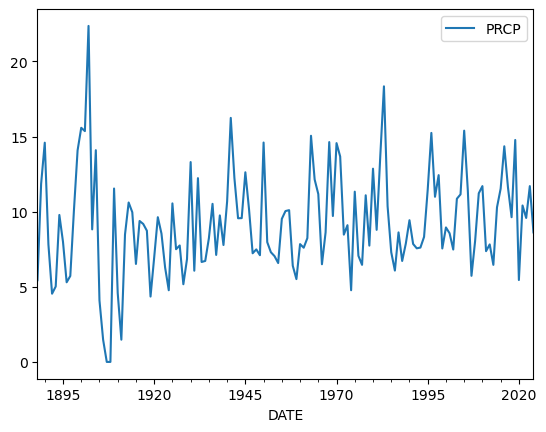

In [5]:
#Clean up data

#resample data as yearly total or perciption 
ann_Elko_df=Elko_df.resample('YS').sum()
ann_Elko_df.plot()

In [6]:
#Fit OLS regression to the data 

# Clean up values in the data, causing issues
#ann_Boul_climate_df_clean= (
   # ann_Boul_climate_df
    #.loc['1893':]    #Selects rows from 1890 on
    #.dropna(subset=['TOBS']) #drops all Null values from dataset, in this case TOBS


#Reset the default index, time (as in year)
#ann_Boul_climate_df_clean=ann_Boul_climate_df_clean.reset_index()

#Reshape 'DATE' Column to be a 2D array for scikit-learn 
date=ann_Elko_df.index.year.values.reshape(-1,1) #grab only the years from the index, reshape so it fits into the model 
precip=ann_Elko_df['PRCP'].values

#Create and fit the linear regression model 

Elko_model= LinearRegression()
Elko_model.fit(date,precip)

#Get slope and intercept 
slope = Elko_model.coef_[0]
intercept = Elko_model.intercept_

#Results 
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: 0.015129884070416487
Intercept: -20.367045942464575


In [7]:
#model summary 

#Add a constant term to the independent variable (for intercept)
precip=sm.add_constant(precip)
#Fit OLS model 
model= sm.OLS(date,precip).fit()
#print model summary 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.164
Date:                Sun, 20 Oct 2024   Prob (F-statistic):             0.0433
Time:                        16:39:04   Log-Likelihood:                -696.13
No. Observations:                 137   AIC:                             1396.
Df Residuals:                     135   BIC:                             1402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1937.7542      9.550    202.913      0.0

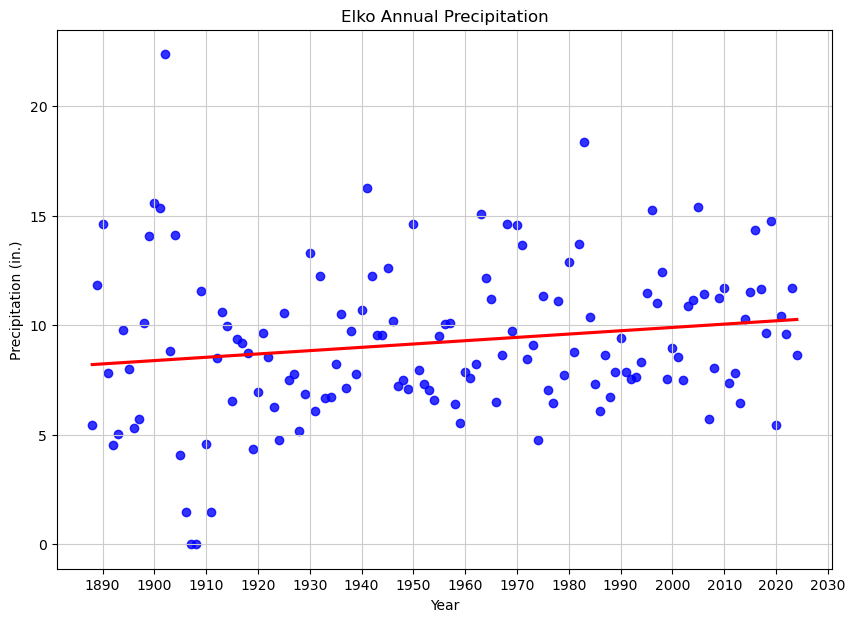

<Figure size 640x480 with 0 Axes>

In [10]:
#Plot Data

#Plot Size 
plt.figure(figsize=(10,7))

# Plot annual average temperature data with a trend line
ax = sns.regplot(
    x=ann_Elko_df.index.year,
    y=ann_Elko_df.PRCP,
    color="blue",
    line_kws=dict(color="red"),
    ci=None
    )
# Set plot labels
ax.set(
    title='Elko Annual Precipitation',
    xlabel='Year',
    ylabel='Precipitation (in.)',
    
)
#Display grid in light grey 
ax.grid(
    which='both',
    color='.8'
    )
#Format x ticks to show up every 10 years
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=15))

# Display the plot without extra text
plt.show()

#Save the plot
plt.savefig('ElkoPrecipitation.png', format='png')